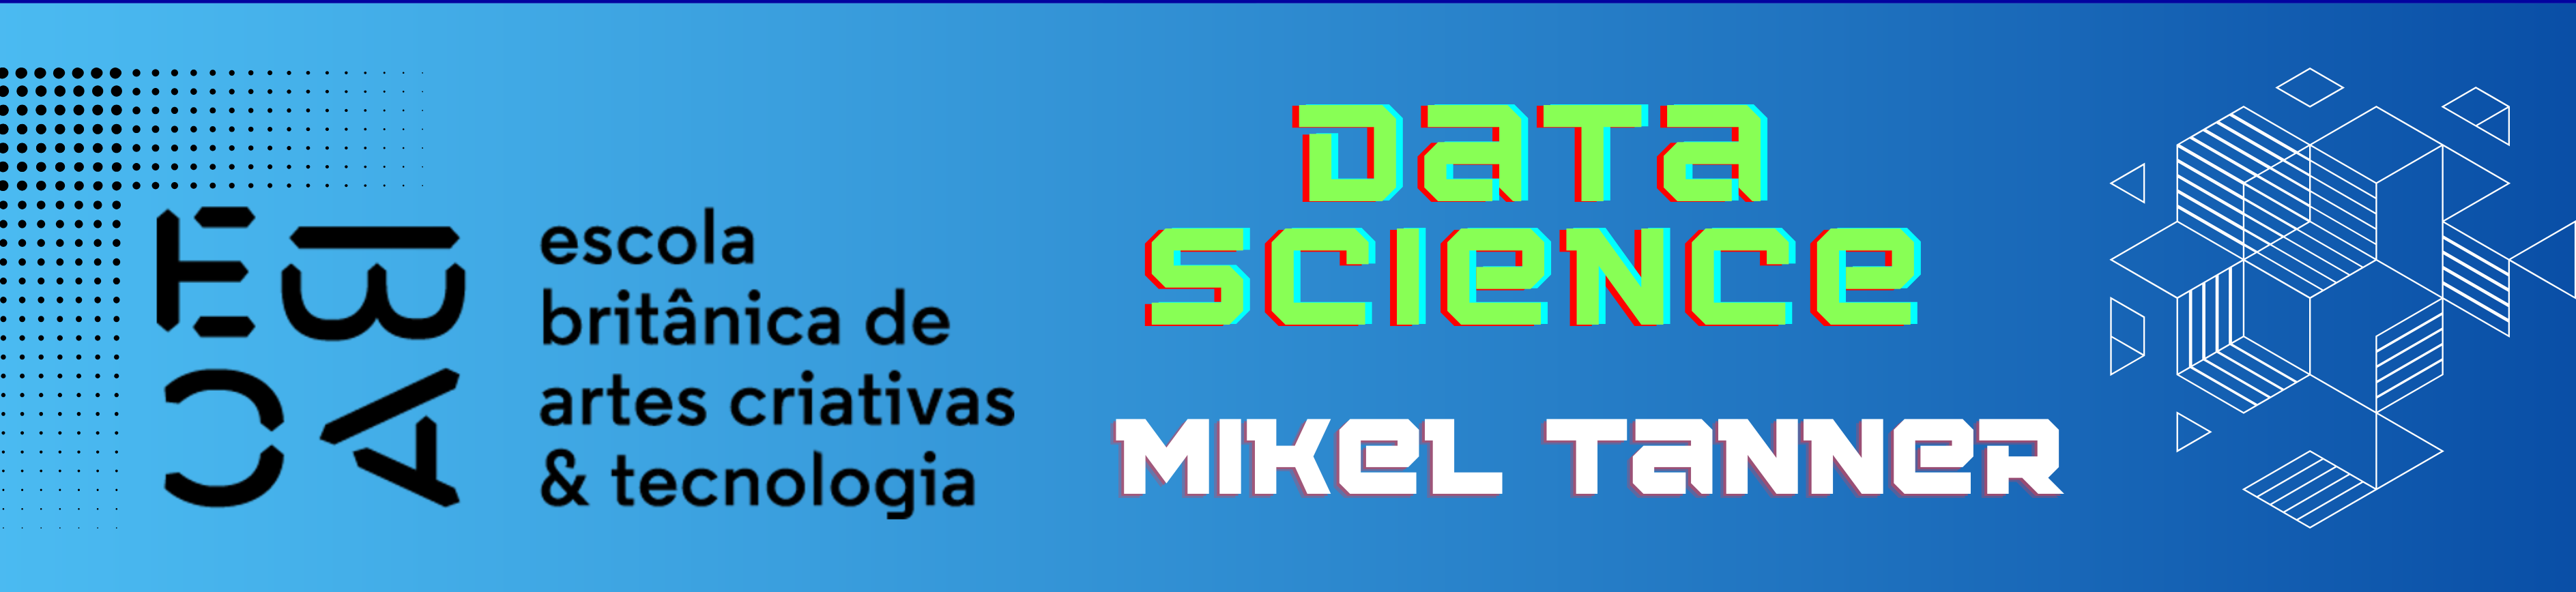

# <span style="color: navy;"> **Profession: Data Scientist**
### **Module 22** |  Descritiva III - Gráficos interativos | Exercise 01
**Student:** [Mikel Tanner](https://www.linkedin.com/in/mikel-tanner/)<br>
**Date:** 4th September 2025.



# Tarefa 01

- Leia os enunciados com atenção
- Saiba que pode haver mais de uma resposta correta
- Insira novas células de código sempre que achar necessário
- Em caso de dúvidas, procure os monitores
- Divirta-se :)

#### 1. Baixando dados de ativos
    1. Baixe os dados de três ativos da sua escolha do Yahoo Finance, correspondente a um período de pelo menos 2 anos até a data mais recente.
    2. Salve esses dados para que você possa utilizá-los na próxima tarefa.

In [3]:
# Importing the relevant libraries
from pandas_datareader import data as web
import plotly.express as px
from plotly import graph_objects
import yfinance as yf
import pandas as pd
import numpy as np

In [31]:
%%time
ticker =  ["AAPL", "MSFT", "AMZN", "NVDA", "GOOGL"] 
data = yf.download(ticker, start="2023-08-01", end=None, auto_adjust= True)

data.head(5)

[*********************100%***********************]  5 of 5 completed

CPU times: total: 188 ms
Wall time: 453 ms


Price            Close                                                 \
Ticker            AAPL        AMZN       GOOGL        MSFT       NVDA   
Date                                                                    
2023-08-01  193.451370  131.690002  130.765762  330.646545  46.478401   
2023-08-02  190.454803  128.210007  127.614662  321.956238  44.241779   
2023-08-03  189.060364  128.910004  127.684219  321.130463  44.487621   
2023-08-04  179.981689  139.570007  127.346268  322.231476  44.652523   
2023-08-07  176.876312  142.220001  130.745865  324.522034  45.389072   

Price             High                                                 ...  \
Ticker            AAPL        AMZN       GOOGL        MSFT       NVDA  ...   
Date                                                                   ...   
2023-08-01  194.559006  133.690002  131.839326  332.809317  46.871161  ...   
2023-08-02  193.026102  130.229996  129.314459  327.982477  45.811812  ...   
2023-08-03  190.247118  129.839996  128.618618  324.295957  45.090251  ...   
2023-08-04  185.312209  143.630005  130.725992  329.466904  45.613929  ...   
2023-08-07  181.109079  142.539993  130.825390  325.505106  45.511998  ...   

Price             Open                                                 \
Ticker            AAPL        AMZN       GOOGL        MSFT       NVDA   
Date                                                                    
2023-08-01  194.074423  133.550003  130.000348  329.516018  46.431429   
2023-08-02  192.887648  130.149994  128.678275  327.982477  45.802819   
2023-08-03  189.455959  127.480003  127.207085  320.481631  43.773061   
2023-08-04  183.472734  141.059998  128.509291  326.262079  44.957336   
2023-08-07  180.120115  140.990005  128.389999  322.811497  45.083261   

Price          Volume                                            
Ticker           AAPL       AMZN     GOOGL      MSFT       NVDA  
Date                                                             
2023-08-01   35175100   42098500  23166800  18311900  237858000  
2023-08-02   50389300   51027600  26273300  27761300  530142000  
2023-08-03   61235200   88585200  20089500  18253700  324176000  
2023-08-04  115956800  153128500  26147200  23741500  362666000  
2023-08-07   97576100   71213100  22746300  17741500  322154000  

[5 rows x 25 columns]

In [43]:
data.to_csv('data.csv')

#### 2. Observando a volatilidade dentro do dia
1. Calcule a amplitude de variação do valor do ativo dentro do dia. Essa amplitude você pode calcular com um comando simples de adicionar uma coluna no Pandas: (valor máximo - valor mínimo).
2. Monte um gráfico de linha mostrando a variação dessa amplitude ao longo do período coletado, por ativo.
3. Veja se consegue identificar que ativo apresentou maior volatilidade.

In [34]:
# Calculating the amplitude
amplitude = data['High']-data['Low']
amplitude.head(5)

Ticker,AAPL,AMZN,GOOGL,MSFT,NVDA
Date,,,,,
2023-08-01,1.433996,2.070007,1.938387,4.758066,0.872464
2023-08-02,3.293239,3.409996,2.514916,7.146956,2.451491
2023-08-03,1.661453,3.429993,1.958257,3.863468,1.317190
2023-08-04,5.399754,4.309998,3.578529,7.766296,1.248229
2023-08-07,5.716214,3.589996,2.574556,3.529227,0.976400


In [38]:
# For a vertical view
amp_vertical = amplitude.stack().reset_index()
amp_vertical.columns = ['data', 'ticker', 'amplitude']

amp_vertical.head()

,data,ticker,amplitude
0,2023-08-01,AAPL,1.433996
1,2023-08-01,AMZN,2.070007
2,2023-08-01,GOOGL,1.938387
3,2023-08-01,MSFT,4.758066
4,2023-08-01,NVDA,0.872464


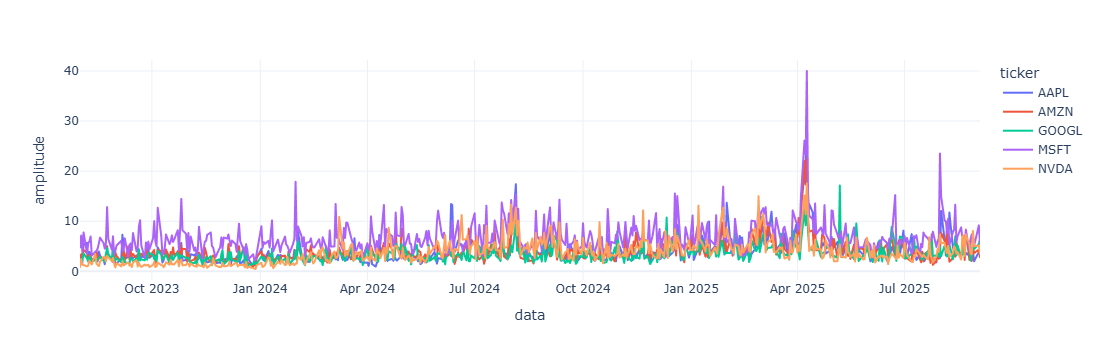

In [41]:
fig = px.line(amp_vertical, x="data", y="amplitude", color='ticker', template='plotly_white')
fig.show()


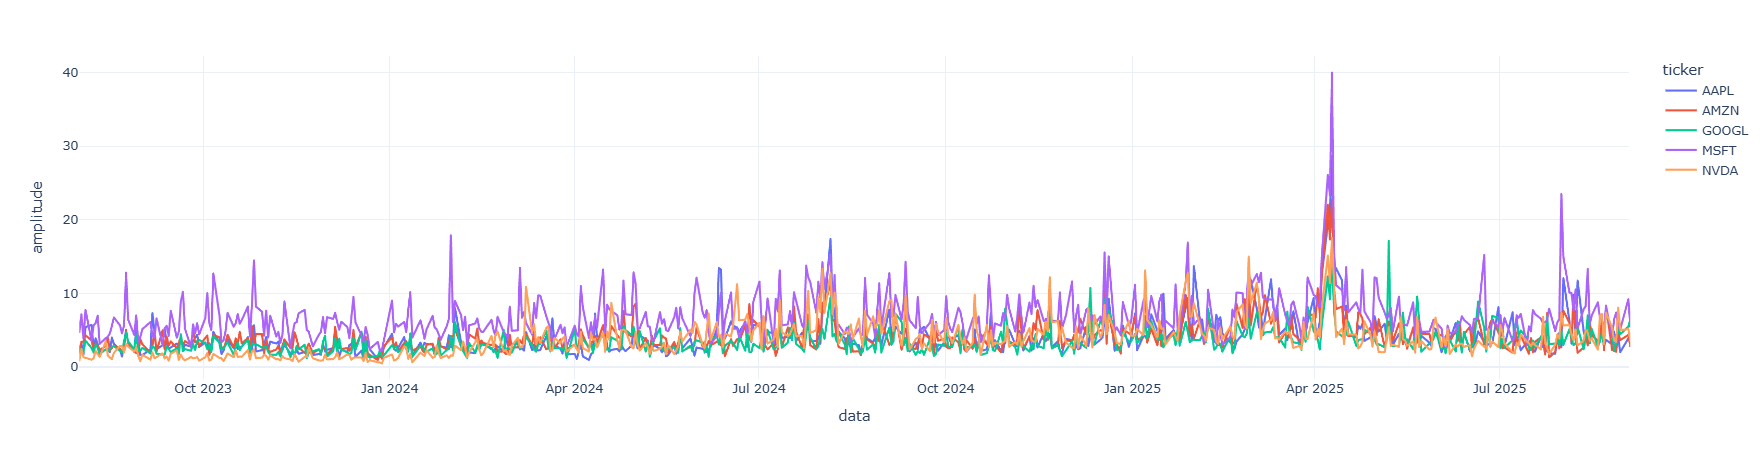